In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
data = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images = train_images / 255.0 # Normalizing from 0 to 1 
test_images = test_images / 255.0 # Normalizing from 0 to 1

### Defining the model annotations
__Flatten:__ It is necessary to flat the data in order to pass to the other neurons with the function:

<code>
    keras.layers.Flatten(input_shape = (param1 , param2))
</code>

__Dense layer:__ A fully connected layer (each neuron is connected to every other neuron with the function:

<code>
    keras.layers.Dense(#_of_neurons, activation = "activation_func")
</code>

*Relu:*  A rectifier function 

*Softmax:*  Essentially the probability of the network at certain value, this is, it gives a value of what it thinks it is for each given class.
    

In [8]:
# Defining the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), # Input layer
    keras.layers.Dense(128, activation = "relu"), # Rectifier layer
    keras.layers.Dense(10, activation = "softmax") # Softmax layer
]) 

### Setting paramater for the model annotations
The parameter *adam* is tipically used while using the function
<code>
    model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
</code>
Taking into consideration that we are caring about the accuracy ( *accuracy* might change)

In [9]:
# Setting paramaters for the model 
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### Training the model annotations

In order to train the models, the next function can be useful:

<code>
    model.fit(training_target, label_target, epochs = #_of_epochs)
</code>


In [10]:
# Training the model
model.fit(train_images, train_labels, epochs = 20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4970 - accuracy: 0.8246
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3741 - accuracy: 0.8646
Epoch 3/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3360 - accuracy: 0.8784
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3129 - accuracy: 0.8856
Epoch 5/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2947 - accuracy: 0.8908
Epoch 6/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2785 - accuracy: 0.8964
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2661 - accuracy: 0.9022
Epoch 8/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2556 - accuracy: 0.9054
Epoch 9/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2469 - accuracy: 0.9080
Epoch 10/20
60

### Testing the model annotations

In order to test the model already trained we should use the function 
<code>
    model.evaluate(target_to_test, label_to_target)
</code>
that returns two parameters the **loss** and the **accuracy**


In [11]:
# Testing the model with the test images and labels
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("-----------------")
print("Loss: %.4f" % test_loss) 
print("Accuracy: %.4f" % test_acc)
print("-----------------")

10000/10000 [==============================] - 1s 92us/sample - loss: 0.3558 - accuracy: 0.8886
-----------------
Loss: 0.3558
Accuracy: 0.8886
-----------------


### Using the model to make predictions

An useful function to predict the model and see what returns is 
<code>
    model.predict(target_to_test)
</code>
It gives you a bunch of predictions, predicting all of them.

With the function
<code>
    np.argmax(prediction)
</code>
it gets the largest value and finds the index of it

In order to see the name instead of the index of the class, it can be done by taking the value and pass it to *class_names* variable that was previously created

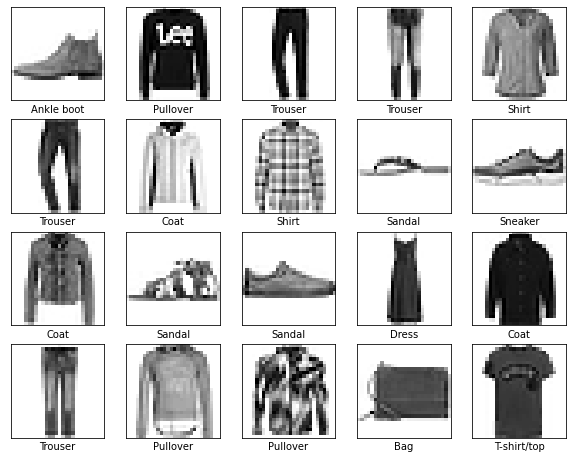

In [32]:
predictions = model.predict(test_images)
plt.figure(figsize =(10, 10))
# prediction = int(len(predictions) / 1000)
for prediction in range(int(len(predictions) / 500)):
#     print("The predicted clothe is:", class_names[np.argmax(predictions[prediction])])
    plt.subplot(5, 5, prediction + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[prediction], plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[prediction])])
plt.show()